In [124]:
from scipy import stats
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

In [2]:
house_price = pd.read_csv('Housing_Price_Data.csv')

In [3]:
house_price

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [4]:
# kiểm tra giá trị null
house_price.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [123]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    float64
 1   area              545 non-null    int64  
 2   bedrooms          545 non-null    int64  
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    int64  
 5   mainroad          545 non-null    object 
 6   guestroom         545 non-null    object 
 7   basement          545 non-null    object 
 8   hotwaterheating   545 non-null    object 
 9   airconditioning   545 non-null    object 
 10  parking           545 non-null    int64  
 11  prefarea          545 non-null    object 
 12  furnishingstatus  545 non-null    object 
dtypes: float64(1), int64(5), object(7)
memory usage: 55.5+ KB


{'whiskers': [<matplotlib.lines.Line2D at 0x1c1a84bf110>,
 'caps': [<matplotlib.lines.Line2D at 0x1c1a7fffe90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c1a860ad50>],
 'medians': [<matplotlib.lines.Line2D at 0x1c1a8638f50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c1a8639590>],
 'means': []}

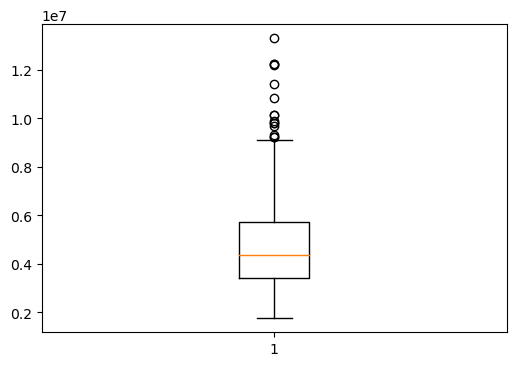

In [87]:
# Xem outliers của price bằng boxplot
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['figure.figsize'] = (6,4)
plt.boxplot(house_price.price)

In [88]:
# Loại bỏ outliers bằng IQR
Q1 = house_price.price.quantile(0.25)
Q3 = house_price.price.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
uper_limit = Q3 + 1.5*IQR
house_iqr = house_price[(house_price.price>lower_limit)&(house_price.price<uper_limit)]
house_iqr.shape

(530, 13)

{'whiskers': [<matplotlib.lines.Line2D at 0x1c1a86902d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c1a8691690>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c1a8683a50>],
 'medians': [<matplotlib.lines.Line2D at 0x1c1a8648750>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c1a7ffa550>],
 'means': []}

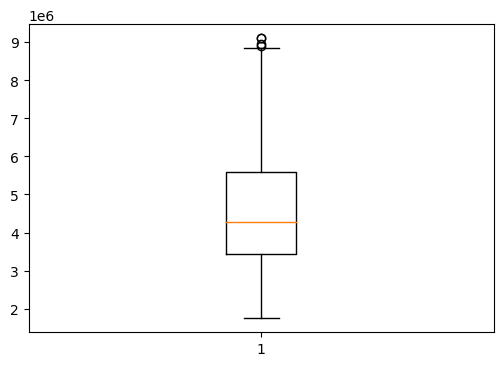

In [89]:
# Đồ thị boxplot sau khi loại bỏ outliers bằng IQR
plt.boxplot(house_iqr.price)

In [90]:
# Mô tả dữ liệu sau khi loại bỏ outliers
house_iqr.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.300000e+02,530.000000,530.000000,530.000000,530.000000,530.000000
mean,4.600663e+06,5061.518868,2.943396,1.260377,1.788679,0.664151
std,1.596119e+06,2075.449479,0.730515,0.464359,0.861190,0.843320
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3547.500000,2.000000,1.000000,1.000000,0.000000
50%,4.270000e+06,4500.000000,3.000000,1.000000,2.000000,0.000000
75%,5.600000e+06,6315.750000,3.000000,1.000000,2.000000,1.000000
max,9.100000e+06,15600.000000,6.000000,3.000000,4.000000,3.000000


In [91]:
house_iqr

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,yes,no,yes,no,no,2,no,semi-furnished
16,9100000,6600,4,2,2,yes,yes,yes,no,yes,1,yes,unfurnished
17,8960000,8500,3,2,4,yes,no,no,no,yes,2,no,furnished
18,8890000,4600,3,2,2,yes,yes,no,no,yes,2,no,furnished
19,8855000,6420,3,2,2,yes,no,no,no,yes,1,yes,semi-furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [92]:
## MULTIPLE LINEAR REGRESSION

In [93]:
# Tạo một bản sao của DataFrame house_iqr
housedata = house_iqr.copy()

In [94]:
# Xử lý biến giả
housedata['mainroad'] = housedata['mainroad'].map({'yes': 0, 'no': 1})
housedata['guestroom'] = housedata['guestroom'].map({'yes': 0, 'no': 1})
housedata['basement'] = housedata['basement'].map({'yes': 0, 'no': 1})
housedata['hotwaterheating'] = housedata['hotwaterheating'].map({'yes': 0, 'no': 1})
housedata['airconditioning'] = housedata['airconditioning'].map({'yes': 0, 'no': 1})
housedata['prefarea'] = housedata['prefarea'].map({'yes': 0, 'no': 1})
housedata['furnishingstatus'] = housedata['furnishingstatus'].map({'furnished': 0, 'semi-furnished': 1, 'unfurnished': 2})

In [95]:
housedata

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,0,1,0,1,1,2,1,1
16,9100000,6600,4,2,2,0,0,0,1,0,1,0,2
17,8960000,8500,3,2,4,0,1,1,1,0,2,1,0
18,8890000,4600,3,2,2,0,0,1,1,0,2,1,0
19,8855000,6420,3,2,2,0,1,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,0,1,0,1,1,2,1,2
541,1767150,2400,3,1,1,1,1,1,1,1,0,1,1
542,1750000,3620,2,1,1,0,1,1,1,1,0,1,2
543,1750000,2910,3,1,1,1,1,1,1,1,0,1,0


In [96]:
#hệ số tương quan để so sánh quan hệ
corr_matrix = housedata[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'furnishingstatus']].corr()
print (corr_matrix)

                      area  bedrooms  bathrooms   stories  mainroad  \
area              1.000000  0.112056   0.133472  0.063939 -0.289321   
bedrooms          0.112056  1.000000   0.350025  0.404628  0.024639   
bathrooms         0.133472  0.350025   1.000000  0.308026 -0.023649   
stories           0.063939  0.404628   0.308026  1.000000 -0.116551   
mainroad         -0.289321  0.024639  -0.023649 -0.116551  1.000000   
furnishingstatus -0.170043 -0.110891  -0.145684 -0.100844  0.153407   

                  furnishingstatus  
area                     -0.170043  
bedrooms                 -0.110891  
bathrooms                -0.145684  
stories                  -0.100844  
mainroad                  0.153407  
furnishingstatus          1.000000  


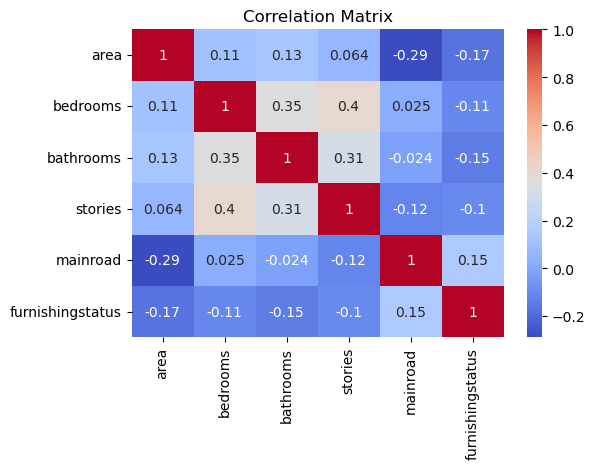

In [97]:
import seaborn as sns
# ma trận hệ số tương quan:
corr_matrix = housedata[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'furnishingstatus']].corr()

# Vẽ biểu đồ ma trận tương quan
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [98]:
# Biến độc lập và biến phụ thuộc
x = housedata[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'furnishingstatus']]
y = housedata['price']

In [99]:
x

,area,bedrooms,bathrooms,stories,mainroad,furnishingstatus
15,6000,4,1,2,0,1
16,6600,4,2,2,0,2
17,8500,3,2,4,0,0
18,4600,3,2,2,0,0
19,6420,3,2,2,0,1
...,...,...,...,...,...,...
540,3000,2,1,1,0,2
541,2400,3,1,1,1,1
542,3620,2,1,1,0,2
543,2910,3,1,1,1,0


In [100]:
y

15     9100000
16     9100000
17     8960000
18     8890000
19     8855000
        ...   
540    1820000
541    1767150
542    1750000
543    1750000
544    1750000
Name: price, Length: 530, dtype: int64

In [101]:
#tạo intercept b0
x1 = sm.add_constant(x)
x1

,const,area,bedrooms,bathrooms,stories,mainroad,furnishingstatus
15,1.0,6000,4,1,2,0,1
16,1.0,6600,4,2,2,0,2
17,1.0,8500,3,2,4,0,0
18,1.0,4600,3,2,2,0,0
19,1.0,6420,3,2,2,0,1
...,...,...,...,...,...,...,...
540,1.0,3000,2,1,1,0,2
541,1.0,2400,3,1,1,1,1
542,1.0,3620,2,1,1,0,2
543,1.0,2910,3,1,1,1,0


In [102]:
result = sm.OLS(y, x1).fit()

In [103]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     105.2
Date:                Thu, 04 Apr 2024   Prob (F-statistic):           1.30e-86
Time:                        03:40:42   Log-Likelihood:                -8111.8
No. Observations:                 530   AIC:                         1.624e+04
Df Residuals:                     523   BIC:                         1.627e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             9.827e+05   2.52e+05      3.893      0.000    4.87e+05    1.48e+06
area               294.1004     24.113     12.197      0.000     246.730     341.470
bedrooms          1.632e+05   7.34e+04      2.222      0.027    1.89e+04    3.07e+05
bathrooms         9.491e+05   1.11e+05      8.538      0.000    7.31e+05    1.17e+06
stories           4.853e+05   6.14e+04      7.899      0.000    3.65e+05    6.06e+05
mainroad         -6.479e+05   1.42e+05     -4.572      0.000   -9.26e+05    -3.7e+05
furnishingstatus  -2.97e+05   6.38e+04     -4.656      0.000   -4.22e+05   -1.72e+05
==============================================================================
Omnibus:                       39.613   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.158
Skew:                           0.564   Prob(JB):                     3.87e-13
Kurtosis:                       4.148   Cond. No.                     3.02e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [104]:
693600 + 321.6181*7420 + 405000*4 + 1333000*2 + (-820900)*0 + (-357800)*0

7366006.302

In [120]:
housedata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 530 entries, 15 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             530 non-null    float64
 1   area              530 non-null    int64  
 2   bedrooms          530 non-null    int64  
 3   bathrooms         530 non-null    int64  
 4   stories           530 non-null    int64  
 5   mainroad          530 non-null    int64  
 6   guestroom         530 non-null    int64  
 7   basement          530 non-null    int64  
 8   hotwaterheating   530 non-null    int64  
 9   airconditioning   530 non-null    int64  
 10  parking           530 non-null    int64  
 11  prefarea          530 non-null    int64  
 12  furnishingstatus  530 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 74.1 KB


In [118]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
# Huấn luyện mô hình hồi quy tuyến tính với DataFrame mới
lm.fit(x, y)

# Dự đoán giá trị price với DataFrame mới
y_pred = lm.predict(x)
y_pred = pd.DataFrame(y_pred, columns=['price_predict'])

# Tạo DataFrame so sánh giữa giá trị dự đoán và giá trị thực tế từ DataFrame mới
result_compare = pd.concat([x, y, y_pred], axis=1)
result_compare['deviation'] = result_compare['price_predict'] - result_compare['price']
result_compare

,area,bedrooms,bathrooms,stories,mainroad,furnishingstatus,price,price_predict,deviation
15,6000.0,4.0,1.0,2.0,0.0,1.0,9100000.0,6.916123e+06,-2.183877e+06
16,6600.0,4.0,2.0,2.0,0.0,2.0,9100000.0,6.124289e+06,-2.975711e+06
17,8500.0,3.0,2.0,4.0,0.0,0.0,8960000.0,5.939474e+06,-3.020526e+06
18,4600.0,3.0,2.0,2.0,0.0,0.0,8890000.0,6.449065e+06,-2.440935e+06
19,6420.0,3.0,2.0,2.0,0.0,1.0,8855000.0,5.729932e+06,-3.125068e+06
...,...,...,...,...,...,...,...,...,...
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.427680e+06,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.779333e+06,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.219766e+06,NaN
13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.411512e+06,NaN


In [68]:
#Dự đoán price của 3 giá trị ('area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'furnishingstatus')
x_new=[[4500,3,2,2,0,2], [3990,2,1,2,1,1],[8800,4,3,3,0,0]]
x_new=pd.DataFrame(x_new, columns=['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'furnishingstatus'])
total_predict=lm.predict(x_new)
total_predict=pd.DataFrame(total_predict, columns=['price_predicted'])
df=pd.concat([x_new, total_predict], axis=1)
df

,area,bedrooms,bathrooms,stories,mainroad,furnishingstatus,price_predicted
0,4500,3,2,2,0,2,5.070534e+06
1,3990,2,1,2,1,1,3.457387e+06
2,8800,4,3,3,0,0,8.526812e+06


In [ ]:
## SIMPLE LINEAR REGRESSION

In [127]:
# Tạo một bản sao của DataFrame house_iqr
housesp = house_iqr.copy()

In [128]:
housesp

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,yes,no,yes,no,no,2,no,semi-furnished
16,9100000,6600,4,2,2,yes,yes,yes,no,yes,1,yes,unfurnished
17,8960000,8500,3,2,4,yes,no,no,no,yes,2,no,furnished
18,8890000,4600,3,2,2,yes,yes,no,no,yes,2,no,furnished
19,8855000,6420,3,2,2,yes,no,no,no,yes,1,yes,semi-furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [198]:
x = housesp[['area']]
y = housesp['price']

In [199]:
x

,area
15,6000
16,6600
17,8500
18,4600
19,6420
...,...
540,3000
541,2400
542,3620
543,2910


In [166]:
y

15     9100000
16     9100000
17     8960000
18     8890000
19     8855000
        ...   
540    1820000
541    1767150
542    1750000
543    1750000
544    1750000
Name: price, Length: 530, dtype: int64

In [167]:
x1 = sm.add_constant(x)
x1

,const,area
15,1.0,6000
16,1.0,6600
17,1.0,8500
18,1.0,4600
19,1.0,6420
...,...,...
540,1.0,3000
541,1.0,2400
542,1.0,3620
543,1.0,2910


In [168]:
result = sm.OLS(y, x1).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     185.5
Date:                Thu, 04 Apr 2024   Prob (F-statistic):           2.07e-36
Time:                        04:08:22   Log-Likelihood:                -8241.8
No. Observations:                 530   AIC:                         1.649e+04
Df Residuals:                     528   BIC:                         1.650e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.616e+06   1.57e+05     16.611      0.000    2.31e+06    2.93e+06
area         392.1034     28.792     13.619      0.000     335.543     448.664
==============================================================================
Omnibus:                       29.016   Durbin-Watson:                   0.509
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.439
Skew:                           0.567   Prob(JB):                     9.04e-08
Kurtosis:                       3.426   Cond. No.                     1.44e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

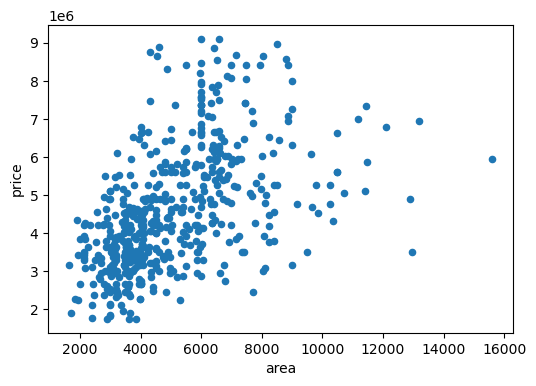

In [169]:
housesp.plot(kind='scatter',x='area',y='price')
plt.show()

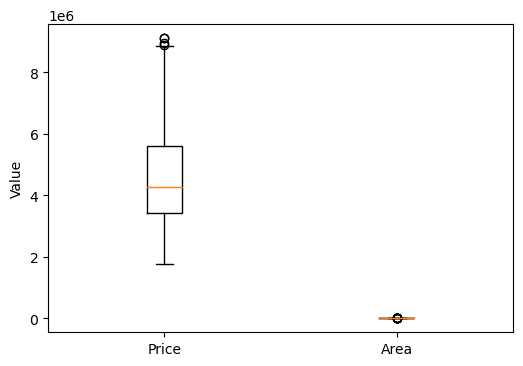

In [171]:
price = housesp['price']
area = housesp['area']
plt.boxplot([price, area])
plt.xticks([1, 2], ['Price', 'Area'])
plt.ylabel('Value')
plt.show()

In [141]:
housesp['mainroad'] = housesp['mainroad'].map({'yes': 0, 'no': 1})
housesp['guestroom'] = housesp['guestroom'].map({'yes': 0, 'no': 1})
housesp['basement'] = housesp['basement'].map({'yes': 0, 'no': 1})
housesp['hotwaterheating'] = housesp['hotwaterheating'].map({'yes': 0, 'no': 1})
housesp['airconditioning'] = housesp['airconditioning'].map({'yes': 0, 'no': 1})
housesp['prefarea'] = housesp['prefarea'].map({'yes': 0, 'no': 1})
housesp['furnishingstatus'] = hous['furnishingstatus'].map({'furnished': 0, 'semi-furnished': 1, 'unfurnished': 2})

In [142]:
housesp.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.509856,0.332293,0.457962,0.432528,-0.310712,-0.290195,-0.195705,-0.082829,-0.462342,0.328308,-0.292536,-0.303320
area,0.509856,1.000000,0.112056,0.133472,0.063939,-0.289321,-0.155552,-0.037246,-0.002533,-0.211505,0.344797,-0.212723,-0.170043
bedrooms,0.332293,0.112056,1.000000,0.350025,0.404628,0.024639,-0.076559,-0.100002,-0.029208,-0.146859,0.110234,-0.066364,-0.110891
bathrooms,0.457962,0.133472,0.350025,1.000000,0.308026,-0.023649,-0.147393,-0.120375,-0.040149,-0.174966,0.127184,-0.032021,-0.145684
stories,0.432528,0.063939,0.404628,0.308026,1.000000,-0.116551,-0.038356,0.166370,-0.020024,-0.281968,0.019222,-0.026019,-0.100844
mainroad,-0.310712,-0.289321,0.024639,-0.023649,-0.116551,1.000000,0.091658,0.041974,-0.017305,0.099208,-0.197896,0.194901,0.153407
guestroom,-0.290195,-0.155552,-0.076559,-0.147393,-0.038356,0.091658,1.000000,0.372114,-0.025219,0.135385,-0.030815,0.170439,0.121165
basement,-0.195705,-0.037246,-0.100002,-0.120375,0.166370,0.041974,0.372114,1.000000,0.000294,0.040937,-0.031970,0.228963,0.104027
hotwaterheating,-0.082829,-0.002533,-0.029208,-0.040149,-0.020024,-0.017305,-0.025219,0.000294,1.000000,-0.121215,-0.051929,-0.047207,0.022760
airconditioning,-0.462342,-0.211505,-0.146859,-0.174966,-0.281968,0.099208,0.135385,0.040937,-0.121215,1.000000,-0.128370,0.087934,0.135633


In [222]:
Area=pd.DataFrame(housesp['area'])
Price=pd.DataFrame(housesp['price'])

In [223]:
Price

,price
15,9100000
16,9100000
17,8960000
18,8890000
19,8855000
...,...
540,1820000
541,1767150
542,1750000
543,1750000


In [224]:
#dự đoán
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
model=lm.fit(Area, Price)

In [225]:
model.coef_

array([[392.10344163]])

In [226]:
model.intercept_

array([2616024.1263686])

In [227]:
model.score(Area, Price)

0.2599530937171657

In [231]:
Area_new = 7000
Area_new = np.array(Area_new).reshape(-1, 1)
Price_predict = model.predict(Area_new)
Price_predict

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[5360748.21775458]])

In [235]:
#predict 
X = pd.DataFrame([7420, 8960, 9960, 7500, 16200, 6000, 7800])
Y=pd.DataFrame(Y)
df=pd.concat([X,Y],axis=1,keys=['Area_new','Area_new'])
df

,Area_new,Price_new
,0,0
0,7420,5.525432e+06
1,8960,6.129271e+06
2,9960,6.521374e+06
3,7500,5.556800e+06
4,16200,8.968100e+06
5,6000,4.968645e+06
6,7800,5.674431e+06


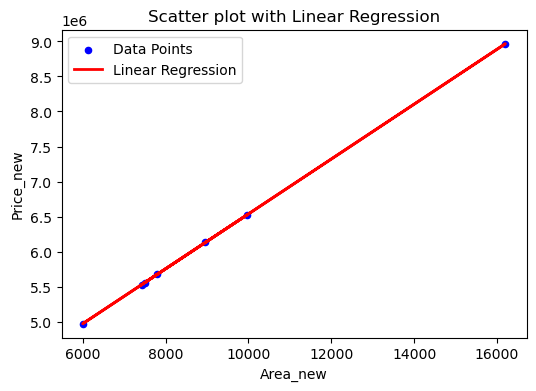

In [246]:
# Vẽ biểu đồ scatter plot
df.plot(kind='scatter', x='Area_new', y='Price_new', color='blue', label='Data Points')

# Vẽ đường thể hiện quan hệ tuyến tính
plt.plot(df['Area_new'], df['Price_new'], color='red', linewidth=2, label='Linear Regression')

plt.xlabel('Area_new')
plt.ylabel('Price_new')
plt.title('Scatter plot with Linear Regression')
plt.legend()
plt.show()